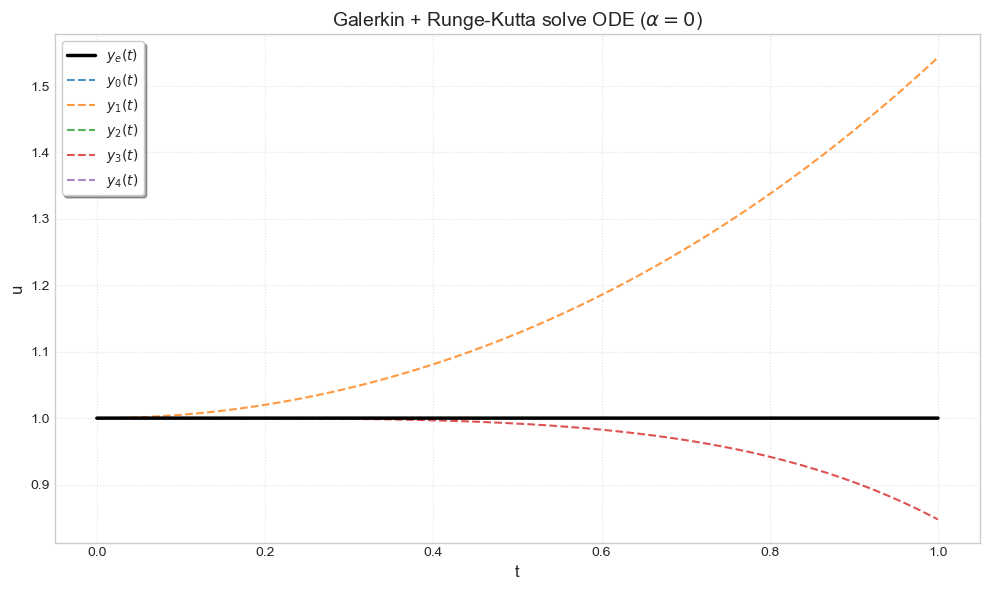

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import numpy as np

def plot(filename, save=True):
    plt.rcParams["font.family"] = "sans-serif"
    plt.rcParams["font.sans-serif"] = ["Arial", "DejaVu Sans", "Liberation Sans"]
    df = pd.read_csv(filename)
    plt.figure(figsize=(10, 6), dpi=100)
    plt.style.use('seaborn-v0_8-whitegrid') 
    x = df['Time']
    if 'Exact' in df.columns:
        plt.plot(x, df['Exact'], 
                 label='${{y}}_{{e}}(t)$', 
                 color='black', 
                 linewidth=2.5, 
                 zorder=10) 
    n_columns = [col for col in df.columns if col.startswith('N=')]
    for col in n_columns:
        plt.plot(x, df[col], 
                 label=f'${{y}}_{{{col[2:]}}}(t)$', 
                 linestyle='--', 
                 linewidth=1.5, 
                 alpha=0.8)
    plt.title(fr'Galerkin + Runge-Kutta solve ODE ($\alpha = 0$)', fontsize=14)
    plt.xlabel("t", fontsize=12)
    plt.ylabel("u", fontsize=12)
    plt.legend(frameon=True, shadow=True, fontsize=10)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    
    if save:
        filename = filename.replace('.csv', '.png')
        plt.savefig(filename)
    
    plt.show()

if __name__ == "__main__":
    plot("../HW5/ode_1.csv")

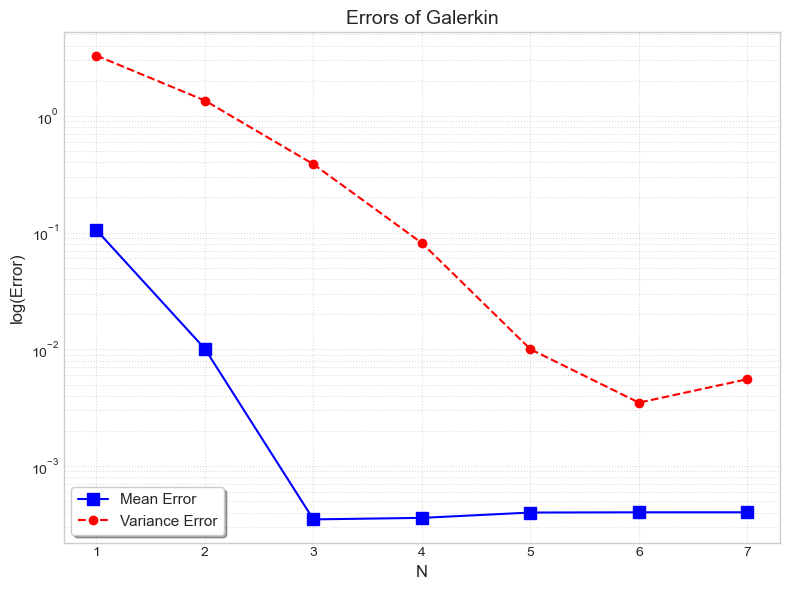

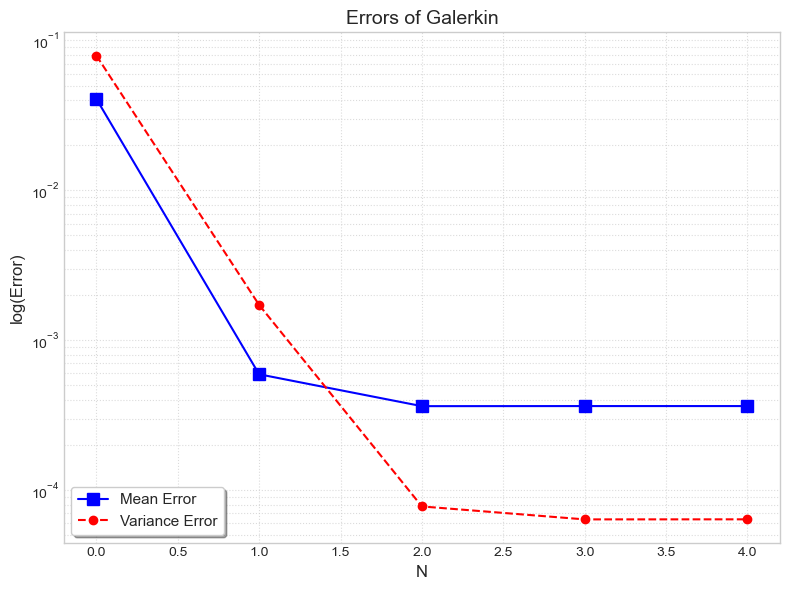

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
 
def plot_errors(file,save_plot = True):
    output_image = file.replace(".csv", ".png")

    df = pd.read_csv(file)

    N = df['N'].values
    mean_err = df['Mean_Error'].values
    var_err = df['Var_Error'].values
    valid_mean = (mean_err > 0)
    valid_var = (var_err > 0)
    N_valid_mean = N[valid_mean]
    mean_err = mean_err[valid_mean]
    N_valid_var = N[valid_var]
    var_err = var_err[valid_var]
    plt.figure(figsize=(8, 6))
    if len(mean_err) > 0:
        line1 = plt.semilogy(N_valid_mean, mean_err,
                        's-', color='blue', markersize=8,
                        label='Mean Error', zorder=10)

    if len(var_err) > 0:
        line2 = plt.semilogy(N_valid_var, var_err,
                        'o--', color='red', markersize=6,
                        label='Variance Error', zorder=10)
    plt.xlabel("N", fontsize=12)
    plt.ylabel("log(Error)", fontsize=12)
    plt.title('Errors of Galerkin', fontsize=14)
    plt.legend(loc='lower left', frameon=True, shadow=True, fontsize=11)
    plt.grid(True, which="both", linestyle=':', alpha=0.7)
    plt.tight_layout()
    if save_plot:
        plt.savefig(output_image, dpi=150, bbox_inches='tight')
    plt.show()

plot_errors("../HW5/ode_2_errors.csv")
plot_errors("../HW5/pde_1_errors.csv")

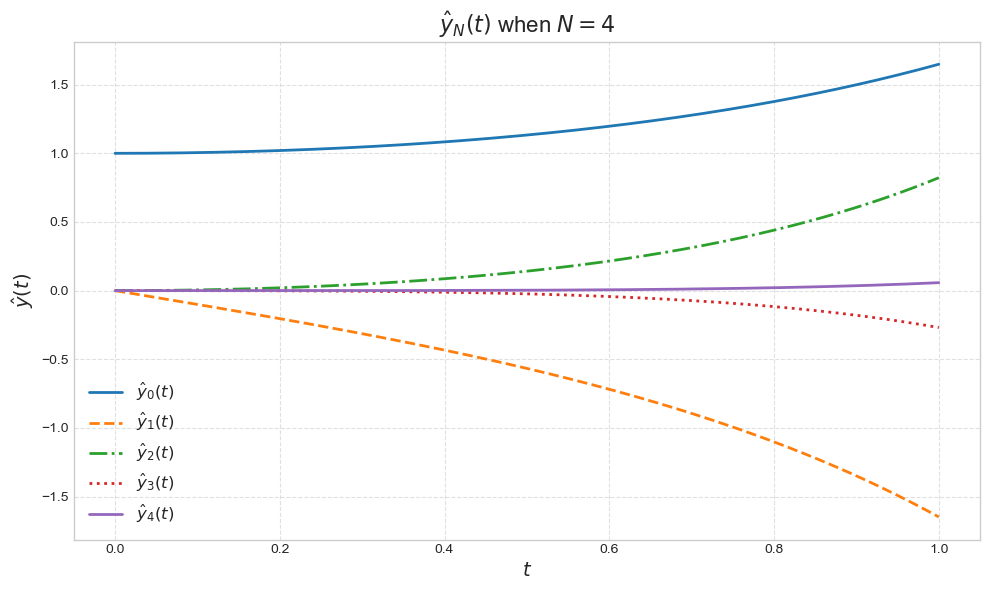

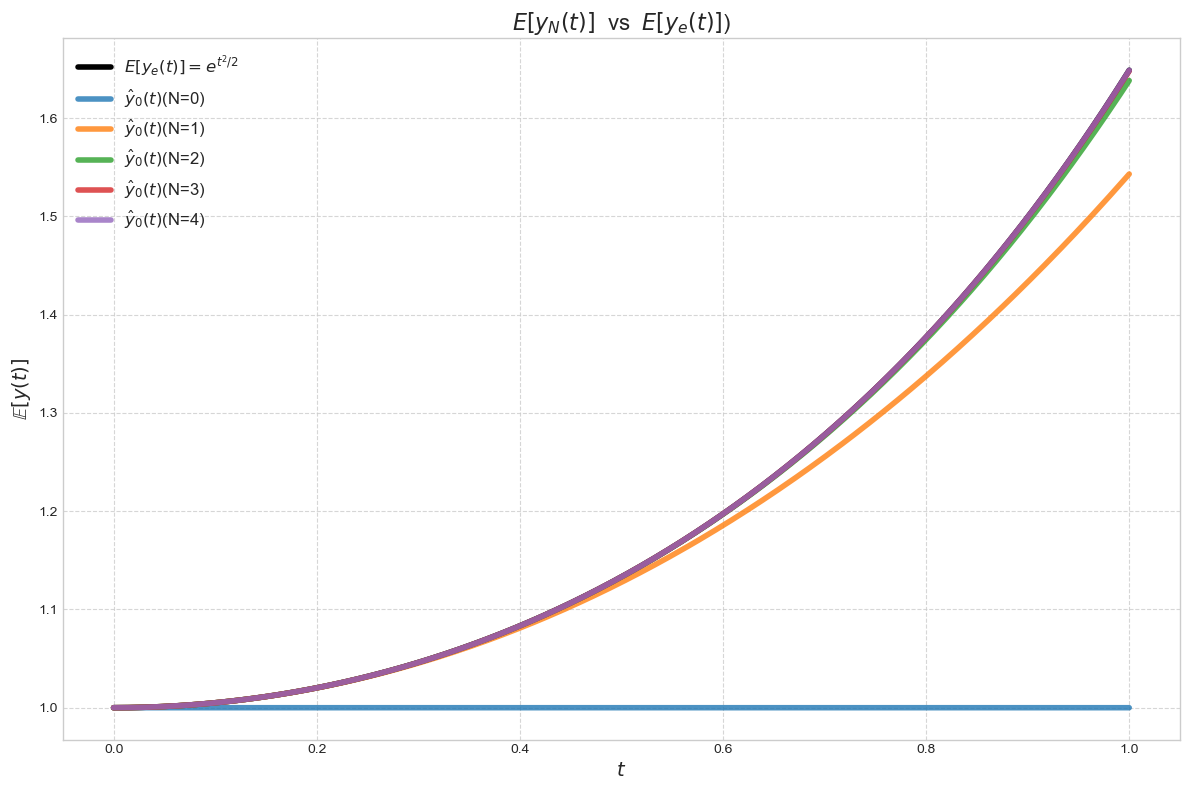

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

BASE_FILENAME = "../HW5/ode_1.csv" 

def plot_coefficients(base_filename, n):
    name_part, ext = os.path.splitext(base_filename)
    csv_file = f"{name_part}_coeffs_N{n}{ext}"

    df = pd.read_csv(csv_file)
    t = df['Grid']
    plt.figure(figsize=(10, 6))
    y_cols = [col for col in df.columns if col.startswith('y')]
    styles = ['-', '--', '-.', ':']
    
    for idx, col in enumerate(y_cols):
        style = styles[idx % len(styles)]
        plt.plot(t, df[col], linestyle=style, linewidth=2, label=f'$\hat{{y}}_{{{idx}}}(t)$')

    plt.title(f'$\hat{{y}}_{{N}}(t)$ when $N = 4$', fontsize=16)
    plt.xlabel('$t$', fontsize=14)
    plt.ylabel('$\hat{{y}}(t)$', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12)
    plt.tight_layout()
    
    plt.savefig(f"../HW5/plot_coefficients_N{n}.png", dpi=300)
    plt.show()

def plot_comparison(base_filename, n_values):
    name_part, ext = os.path.splitext(base_filename)
    plt.figure(figsize=(12, 8))

    t = None
    for n in n_values:
        csv_file = f"{name_part}_coeffs_N{n}{ext}"
        df = pd.read_csv(csv_file)
        if t is None:
            t = df['Grid']
            mean_exact = np.exp(t**2 / 2.0)
            plt.plot(t, mean_exact, 'k-', linewidth=4, label=f'$E[{{y}}_{{e}}(t)] = e^{{t^2/2}}$', alpha=1)
        mean_numeric = df['y0']
        plt.plot(t, mean_numeric, '-', linewidth=4, alpha=0.8, label=f'$\\hat{{y}}_{{{0}}}(t)$(N={n})')
    
    plt.title(f'$E[{{y}}_{{N}}(t)]$  vs  $E[{{y}}_{{e}}(t)]$)', fontsize=16)
    plt.xlabel('$t$', fontsize=14)
    plt.ylabel('$\\mathbb{E}[y(t)]$', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.8)
    plt.legend(fontsize=12, loc='best')
    plt.tight_layout()
    n_str = "_".join(map(str, n_values))
    plt.savefig(f"../HW5/plot_mean_comparison.png", dpi=300)
    plt.show()

if __name__ == "__main__":
    plt.style.use('seaborn-v0_8-whitegrid') 
    plot_coefficients(BASE_FILENAME, 4)
    plot_comparison(BASE_FILENAME, [0,1,2,3,4])